In [1]:
import numpy as np

with open("./bi2se3-bands-bulk-soc-02.dat", "r") as file:
    lines = file.readlines()

data = np.array([])
for line in lines[1:]:
    line = line.strip()
    if line:
        numbers = line.split()
        for num in numbers:
            data=np.append(data,float(num)) 
[nbands,nkpts] = lines[0].split(",")
nbands = int(nbands.split()[2])
nkpts = int(nkpts.split()[1])
print(len(data),nbands,nkpts)

band=np.zeros((nkpts,nbands+1))
print(band.shape)

5994 71 81
(81, 72)


In [2]:
kpts=np.zeros((nkpts,3))
for i in range(nkpts):
    start=i*(nbands+3)
    kpts[i] = data[start:start+3]
for i in range(nbands):
    start=i*(nbands)
    band[:,i+1] = data[3+i::(nbands+3)]

print(kpts)
print(band)


distances = np.linalg.norm(kpts[1:] - kpts[0:-1], axis=1)
distances=np.append(0,distances)
band[:,0]=distances.cumsum()

np.savetxt("band-custom.gnu",band,fmt='%.3f')


[[ 0.        0.        0.      ]
 [ 0.        0.        0.010836]
 [ 0.        0.        0.021672]
 [ 0.        0.        0.032509]
 [ 0.        0.        0.043345]
 [ 0.        0.        0.054181]
 [ 0.        0.        0.065017]
 [ 0.        0.        0.075854]
 [ 0.        0.        0.08669 ]
 [ 0.        0.        0.097526]
 [ 0.        0.        0.108362]
 [ 0.        0.        0.119199]
 [ 0.        0.        0.130035]
 [ 0.        0.        0.140871]
 [ 0.        0.        0.151707]
 [ 0.        0.        0.162544]
 [ 0.        0.        0.17338 ]
 [ 0.        0.        0.184216]
 [ 0.        0.        0.195052]
 [ 0.        0.        0.205889]
 [ 0.        0.        0.216725]
 [ 0.       -0.028868  0.213113]
 [ 0.       -0.057735  0.209501]
 [ 0.       -0.086603  0.205889]
 [ 0.       -0.11547   0.202277]
 [ 0.       -0.144338  0.198664]
 [ 0.       -0.173205  0.195052]
 [ 0.       -0.202073  0.19144 ]
 [ 0.       -0.23094   0.187828]
 [ 0.       -0.259808  0.184216]
 [ 0.     

(4.0, 16.0)

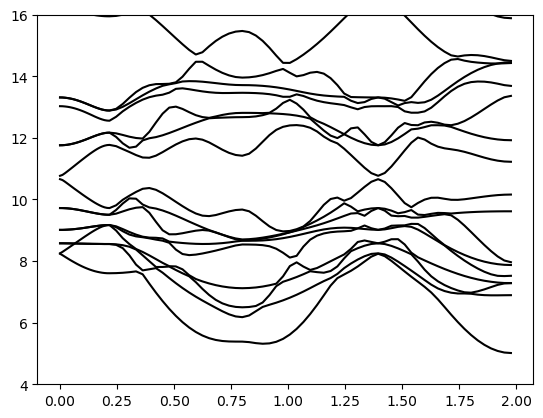

In [5]:
import matplotlib.pyplot as plt


plt.plot(band[:,0],band[:,1:],"-k")

plt.ylim([4,16])